In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [59]:
image=cv2.imread("test/9.png")

In [60]:
final_size = (600, 600)
resized_image = cv2.resize(image, (550, 550))
canvas = np.zeros((final_size[0], final_size[1], 3), dtype=np.uint8)
x_offset = (final_size[0] - resized_image.shape[0]) // 2
y_offset = (final_size[1] - resized_image.shape[1]) // 2
canvas[x_offset:x_offset+resized_image.shape[0], y_offset:y_offset+resized_image.shape[1]] = resized_image
gray_img= cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
thresh=10
binary_img = cv2.threshold(gray_img, thresh, 255, cv2.THRESH_BINARY)[1]
corners = cv2.goodFeaturesToTrack(binary_img, 4, 0.5, 100)
corners = np.int0(corners)
crn=corners.reshape(-1,2).tolist()

sorted_coordinates =sorted(crn, key=lambda x: (x[1], x[0]))
i=0
while i<3:
    if sorted_coordinates[i][0]>sorted_coordinates[i+1][0]:
        sorted_coordinates[i],sorted_coordinates[i+1]=sorted_coordinates[i+1],sorted_coordinates[i]
    i=i+2

pts1=np.float32(sorted_coordinates)
pts2 = np.float32([[0,0],[600,0],[0,600],[600,600]])

M = cv2.getPerspectiveTransform(pts1,pts2)
image = cv2.warpPerspective(canvas,M,(600,600))


C:\Users\Somya\AppData\Local\Temp\ipykernel_19680\1585433588.py:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [52]:
gray_img= cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
thresh=10
binary_img = cv2.threshold(gray_img, thresh, 255, cv2.THRESH_BINARY)[1]



In [53]:
corners = cv2.goodFeaturesToTrack(binary_img, 4, 0.5, 100)
corners = np.int0(corners)

crn=corners.reshape(-1,2).tolist()

C:\Users\Somya\AppData\Local\Temp\ipykernel_19680\3345805650.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [54]:
sorted_coordinates =sorted(crn, key=lambda x: (x[1], x[0]))
i=0
while i<3:
    if sorted_coordinates[i][0]>sorted_coordinates[i+1][0]:
        sorted_coordinates[i],sorted_coordinates[i+1]=sorted_coordinates[i+1],sorted_coordinates[i]
    i=i+2

In [55]:
pts1=np.float32(sorted_coordinates)
pts2 = np.float32([[0,0],[600,0],[0,600],[600,600]])


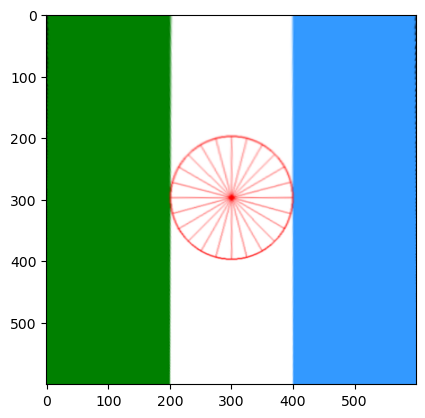

In [61]:


plt.imshow(image)
plt.show()

In [47]:
def solution(image_path):
    image= cv2.imread(image_path)
    ######################################################################
    ######################################################################
    #####  WRITE YOUR CODE BELOW THIS LINE ###############################
    final_size = (600, 600)
    resized_image = cv2.resize(image, (550, 550))
    canvas = np.zeros((final_size[0], final_size[1], 3), dtype=np.uint8)
    x_offset = (final_size[0] - resized_image.shape[0]) // 2
    y_offset = (final_size[1] - resized_image.shape[1]) // 2
    canvas[x_offset:x_offset+resized_image.shape[0], y_offset:y_offset+resized_image.shape[1]] = resized_image
    gray_img= cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
    thresh=10
    binary_img = cv2.threshold(gray_img, thresh, 255, cv2.THRESH_BINARY)[1]
    corners = cv2.goodFeaturesToTrack(binary_img, 4, 0.5, 100)
    corners = np.intp(corners)
    crn=corners.reshape(-1,2).tolist()

    sorted_coordinates =sorted(crn, key=lambda x: (x[1], x[0]))
    i=0
    while i<3:
        if sorted_coordinates[i][0]>sorted_coordinates[i+1][0]:
            sorted_coordinates[i],sorted_coordinates[i+1]=sorted_coordinates[i+1],sorted_coordinates[i]
        i=i+2

    pts1=np.float32(sorted_coordinates)
    pts2 = np.float32([[0,0],[600,0],[0,600],[600,600]])

    M = cv2.getPerspectiveTransform(pts1,pts2)
    image = cv2.warpPerspective(canvas,M,(600,600))

    kernels = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
    image = cv2.filter2D(image, -1, kernels)











    ######################################################################

    return image

In [ ]:
image = cv2.filter2D(image, -1, kernels)

In [48]:
path="test/4.png"
finale=solution(path)
finale = cv2.cvtColor(finale, cv2.COLOR_BGR2RGB)

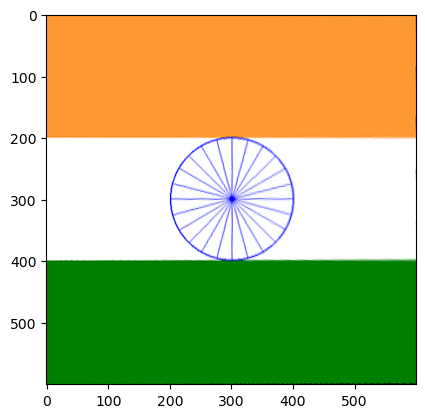

In [49]:
plt.imshow(finale)
plt.show()